In [1]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [6]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

In [7]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [8]:
data2 = data.drop(['CustomerID'], axis=1)

In [9]:
data2.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


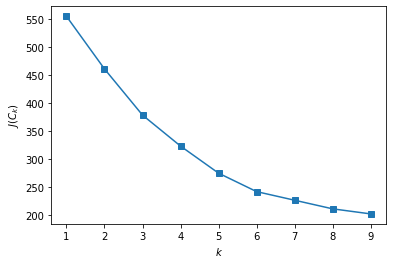

In [10]:
from sklearn.cluster import KMeans

d = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data2)
    d.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), d, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
q = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(data2)
    preds2 = km.predict(data2)
    silhouette = silhouette_score(data2,preds2)
    q.append(silhouette)

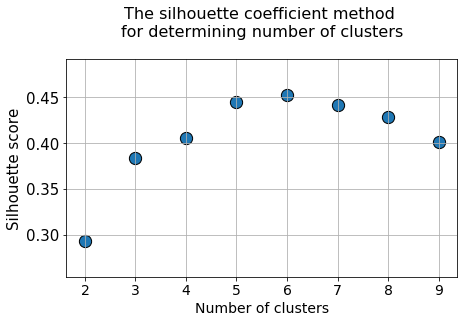

In [13]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=q,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [14]:
model = KMeans(n_clusters=6, random_state=0)
model.fit(data2)
preds = model.predict(data2)
print(preds)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 1 4 1 0 5 4 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


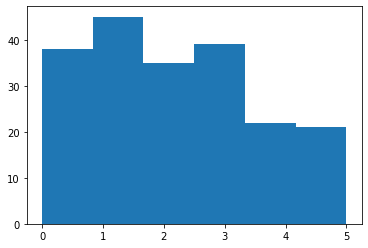

In [15]:
k = 6
plt.hist(preds.data, bins=k)
plt.show()

In [16]:
from sklearn import manifold

tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 21)
data_2d_tsne = tsne.fit_transform(data2)

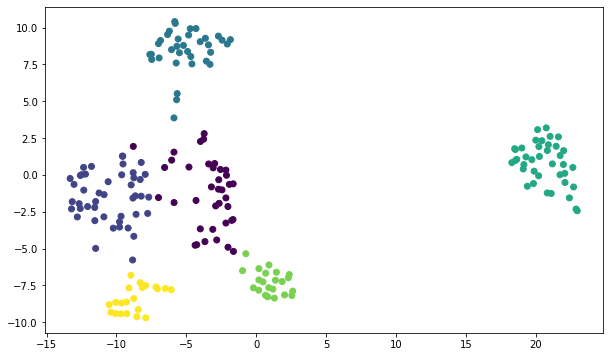

In [17]:
labels = preds
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
classifier = KNeighborsClassifier()
classifier.fit(data_2d_tsne, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
print(classification_report(classifier.predict(data_2d_tsne), labels))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.98      0.96      0.97        46
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        22
           5       1.00      0.95      0.98        22

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.98       200



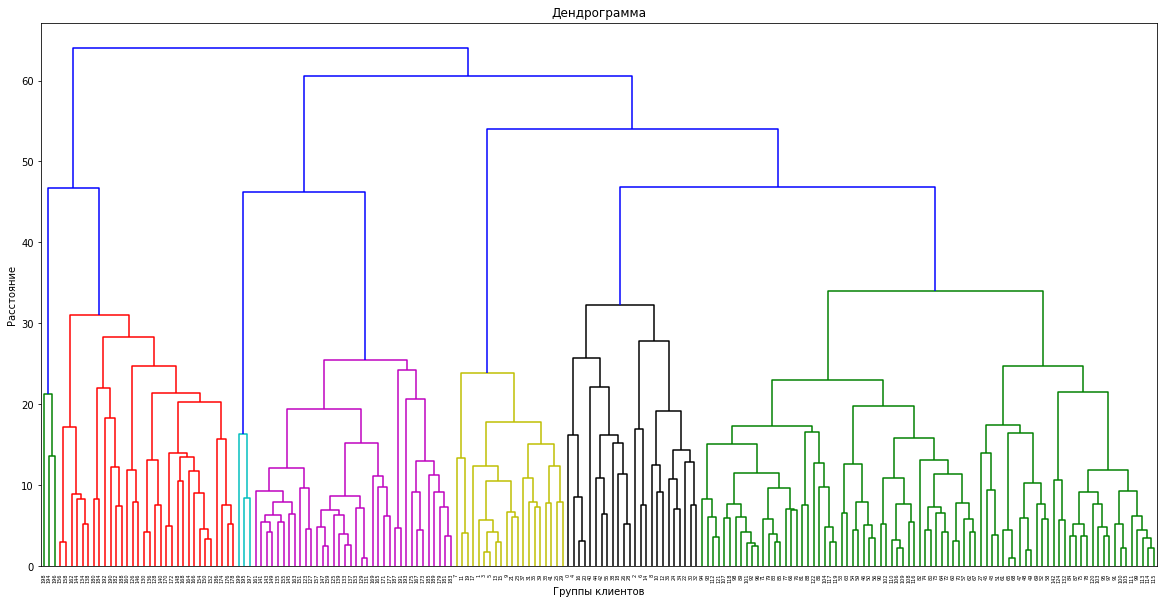

In [21]:
import scipy.cluster.hierarchy as sch
silhouette_score(data2, preds2)

plt.figure(figsize=(20,10))
plt.title('Дендрограмма')
plt.xlabel('Группы клиентов')
plt.ylabel('Расстояние')
dendrogram = sch.dendrogram(sch.linkage(data2, method = 'average'))

In [22]:
data3 = data2

In [23]:
data3['Claster'] = preds

In [24]:
data3.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Claster
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5


In [26]:
data3[data3["Claster"]==0].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Claster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,0.342105,27.000000,56.657895,49.131579,0.0
std,0.480783,7.032742,9.905708,7.853975,0.0
min,0.000000,18.000000,39.000000,29.000000,0.0
25%,0.000000,21.000000,48.000000,42.000000,0.0
50%,0.000000,26.500000,59.500000,50.000000,0.0
75%,1.000000,31.750000,63.750000,55.000000,0.0
max,1.000000,40.000000,76.000000,61.000000,0.0
